In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [2]:
df_drug = pd.read_csv("drug.csv")

In [3]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Drug Type and Patient Distributions

In [5]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


C:\Users\HP\AppData\Local\Temp\ipykernel_292\1979023686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_drug, x='Drug', palette='viridis')


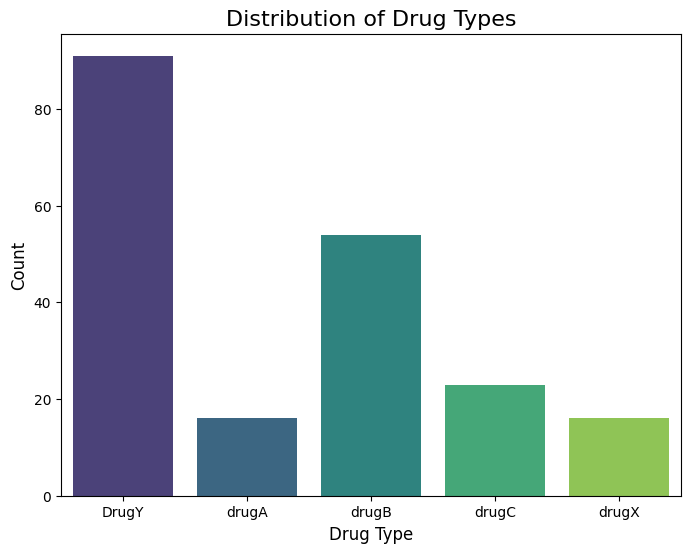

C:\Users\HP\AppData\Local\Temp\ipykernel_292\1979023686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_drug, x='Sex', palette='coolwarm')


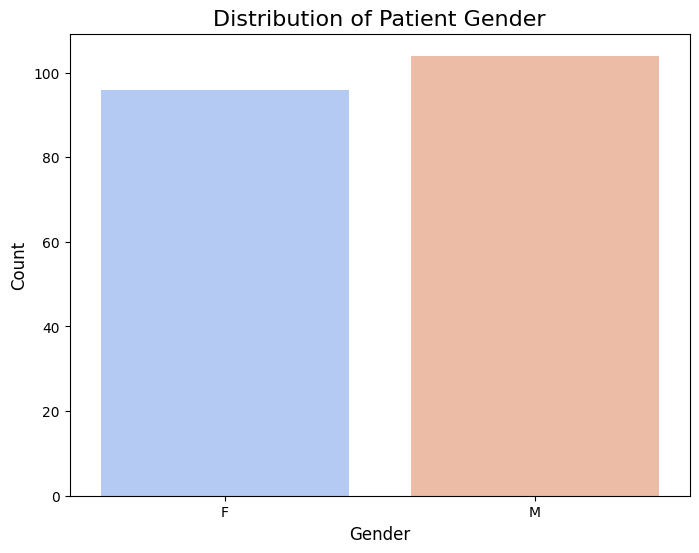

C:\Users\HP\AppData\Local\Temp\ipykernel_292\1979023686.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_drug, x='BP', palette='Set2')


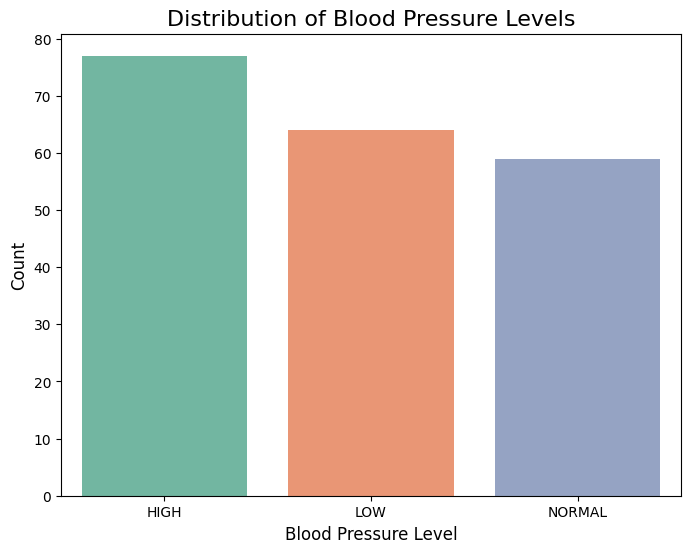

In [6]:
# Plot 1: Distribution of Drug Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df_drug, x='Drug', palette='viridis')
plt.title('Distribution of Drug Types', fontsize=16)
plt.xlabel('Drug Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
drug_labels = LabelEncoder().fit(['DrugY', 'drugB', 'drugC', 'drugA', 'drugX']).classes_  # Replace with your labels
plt.xticks(ticks=range(len(drug_labels)), labels=drug_labels)
plt.show()

# Plot 2: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_drug, x='Sex', palette='coolwarm')
plt.title('Distribution of Patient Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
gender_labels = LabelEncoder().fit(['F', 'M']).classes_ 
plt.xticks(ticks=range(len(gender_labels)), labels=gender_labels)
plt.show()

# Plot 3: Blood Pressure Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_drug, x='BP', palette='Set2')
plt.title('Distribution of Blood Pressure Levels', fontsize=16)
plt.xlabel('Blood Pressure Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
bp_labels = LabelEncoder().fit(['LOW', 'NORMAL', 'HIGH']).classes_  
plt.xticks(ticks=range(len(bp_labels)), labels=bp_labels)
plt.show()


Skewness

In [7]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [8]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


Encoding


In [9]:
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'BP', 'Cholesterol']:
    le = LabelEncoder()
    df_drug[column] = le.fit_transform(df_drug[column])
    label_encoders[column] = le

# Encode target variable
df_drug['Drug'] = LabelEncoder().fit_transform(df_drug['Drug'])

Split features and target

In [10]:
X = df_drug.drop(columns='Drug')
y = df_drug['Drug']


Normalize numerical features

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Models

In [13]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

Train and Evaluate

In [14]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

Results


In [15]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")

Model: Logistic Regression
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



Model: K-Nearest Neighbors
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.91      0.91      0.91        11

    accuracy                           0.90        40

Advanced Evaluation Methods

Confusion matrix

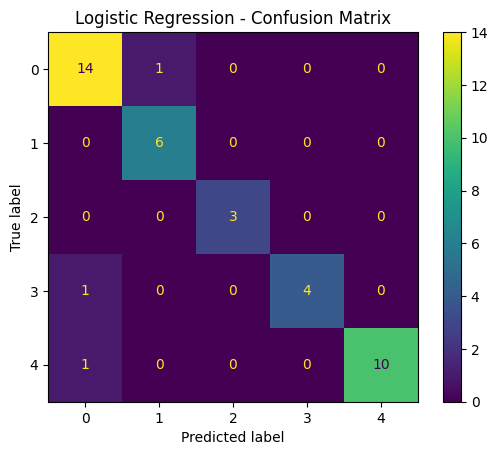

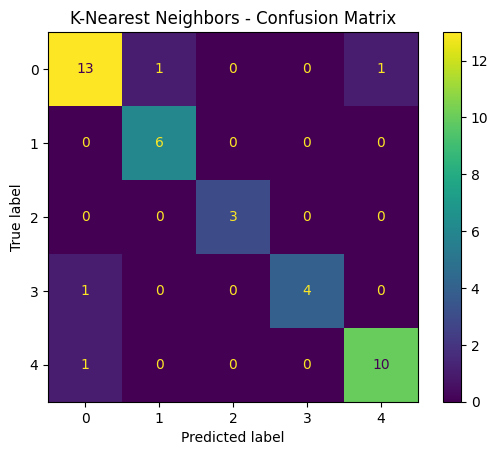

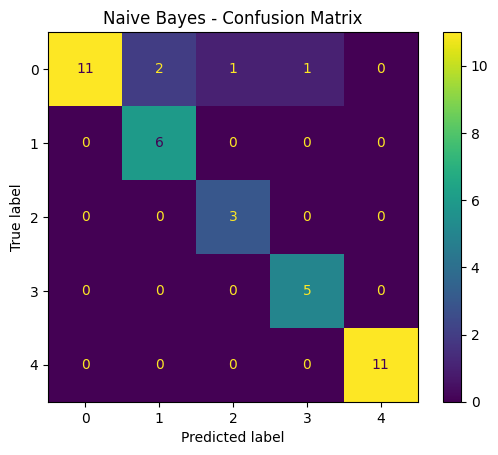

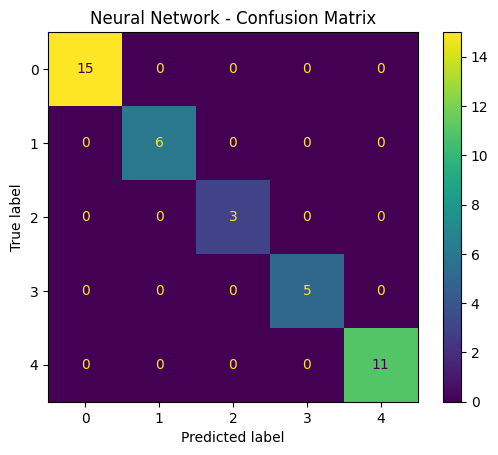

In [16]:
for model_name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


Cross-Validation

In [17]:
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
    print(f"{model_name}: Mean Accuracy = {scores.mean():.2f}, Std Dev = {scores.std():.2f}")


Logistic Regression: Mean Accuracy = 0.93, Std Dev = 0.04
K-Nearest Neighbors: Mean Accuracy = 0.80, Std Dev = 0.03
Naive Bayes: Mean Accuracy = 0.83, Std Dev = 0.04
Neural Network: Mean Accuracy = 0.97, Std Dev = 0.03


Drug Level Performance

Analyze Classification Reports

In [18]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=LabelEncoder().fit(df_drug['Drug']).classes_, output_dict=True)
    
    print(f"Model: {model_name}")
    for drug, metrics in report.items():
        if isinstance(metrics, dict):  # Filter for drug categories
            print(f"  Drug: {drug}")
            print(f"    Precision: {metrics['precision']:.2f}")
            print(f"    Recall: {metrics['recall']:.2f}")
            print(f"    F1-Score: {metrics['f1-score']:.2f}")
            print(f"    Support: {metrics['support']}")
    print("\n")


Model: Logistic Regression
  Drug: 0
    Precision: 0.88
    Recall: 0.93
    F1-Score: 0.90
    Support: 15.0
  Drug: 1
    Precision: 0.86
    Recall: 1.00
    F1-Score: 0.92
    Support: 6.0
  Drug: 2
    Precision: 1.00
    Recall: 1.00
    F1-Score: 1.00
    Support: 3.0
  Drug: 3
    Precision: 1.00
    Recall: 0.80
    F1-Score: 0.89
    Support: 5.0
  Drug: 4
    Precision: 1.00
    Recall: 0.91
    F1-Score: 0.95
    Support: 11.0
  Drug: macro avg
    Precision: 0.95
    Recall: 0.93
    F1-Score: 0.93
    Support: 40.0
  Drug: weighted avg
    Precision: 0.93
    Recall: 0.93
    F1-Score: 0.93
    Support: 40.0


Model: K-Nearest Neighbors
  Drug: 0
    Precision: 0.87
    Recall: 0.87
    F1-Score: 0.87
    Support: 15.0
  Drug: 1
    Precision: 0.86
    Recall: 1.00
    F1-Score: 0.92
    Support: 6.0
  Drug: 2
    Precision: 1.00
    Recall: 1.00
    F1-Score: 1.00
    Support: 3.0
  Drug: 3
    Precision: 1.00
    Recall: 0.80
    F1-Score: 0.89
    Support: 5.0
  Drug: